In [1]:
import numpy as np
import matplotlib.pyplot as pt
%matplotlib inline

In this activity, we will find the optimizer of functions in 1d using two iterative methods. For each one, you should be thinking about cost and convergence rate.

The iterative methods below can be applied to more complex equations, but here we will use a simple polynomial function of the form:

$$f(x) =  a x^4 + b x^3 + c x^2 + d x + e $$

The code snippet below provides the values for the constants, and functions to evaluate $f(x)$, $f'(x)$ and $f''(x)$.

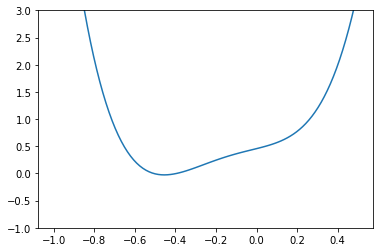

In [2]:
a = 17.09
b = 9.79
c = 0.6317
d = 0.9324
e = 0.4565

def f(x):
    return a*x**4 + b*x**3 + c*x**2 + d*x + e

def df(x):
    return 4*a*x**3 + 3*b*x**2 + 2*c*x + d

def d2f(x):
    return 3*4*a*x**2 + 2*3*b*x + 2*c

xmesh = np.linspace(-1, 0.5, 100)
pt.ylim([-1, 3])
pt.plot(xmesh, f(xmesh))

In [3]:
# # You can later uncomment this code snippet and run the algorithms for a different function

# def f(x): 
#     return -2 + x + 2*x**2 - x**3

# def df(x):
#     return 1 + 4*x - 3*x**2

# def d2f(x):
#     return 4 - 6*x

# xmesh = np.linspace(-2,3, 200)
# pt.plot(xmesh, f(xmesh))
# pt.ylim([-4, 4]);

# Golden Section Search

In [4]:
tau = (np.sqrt(5)-1)/2

# a0 = -0.9
# b0 = -0.2

a0=-2
b0 = 1
h_k = b0 - a0  

x1 = a0 + (1-tau) * h_k
x2 = a0 + tau * h_k
print(x1,x2)
f1 = f(x1)
f2 = f(x2)

errors = [np.abs(h_k)]
count = 0

while (count < 30 and np.abs(h_k) > 1e-6):
 
    if  f1>f2:
        a0 = x1
        x1 = x2
        f1 = f2
        h_k = b0-a0
        x2 = a0 + tau * h_k
        f2 = f(x2)
    else:
        b0 = x2
        x2 = x1
        f2 = f1
        h_k = b0-a0
        x1 = a0 + (1-tau) * h_k
        f1 = f(x1)        
    errors.append(np.abs(h_k))  
    
    print("%10g \t %10g \t %12g %12g" % (a0, b0, errors[-1], errors[-1]/errors[-2]))
    


-0.8541019662496847 -0.1458980337503153
 -0.854102 	          1 	       1.8541     0.618034
 -0.854102 	   0.291796 	       1.1459     0.618034
 -0.854102 	  -0.145898 	     0.708204     0.618034
 -0.583592 	  -0.145898 	     0.437694     0.618034
 -0.583592 	  -0.313082 	      0.27051     0.618034
 -0.583592 	  -0.416408 	     0.167184     0.618034
 -0.519733 	  -0.416408 	     0.103326     0.618034
 -0.480267 	  -0.416408 	    0.0638587     0.618034
 -0.480267 	    -0.4408 	    0.0394669     0.618034
 -0.465192 	    -0.4408 	    0.0243919     0.618034
 -0.465192 	  -0.450117 	     0.015075     0.618034
 -0.459433 	  -0.450117 	   0.00931686     0.618034
 -0.459433 	  -0.453675 	   0.00575814     0.618034
 -0.457234 	  -0.453675 	   0.00355872     0.618034
 -0.455875 	  -0.453675 	   0.00219941     0.618034
 -0.455875 	  -0.454515 	   0.00135931     0.618034
 -0.455356 	  -0.454515 	  0.000840101     0.618034
 -0.455035 	  -0.454515 	  0.000519211     0.618034
 -0.455035 	  -0.454714 

# Newton's method in 1D

Let's fix an initial guess:

In [5]:
#Let's use 
x_exact = -0.4549

x_exact = -0.21525 

In [6]:
x = 0.5

0.2869245965368959


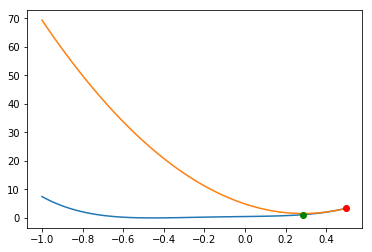

In [7]:
dfx = df(x)
d2fx = d2f(x)

# carry out the Newton step
xnew = x - dfx / d2fx

# plot approximate function
pt.plot(xmesh, f(xmesh))
pt.plot(xmesh, f(x) + dfx*(xmesh-x) + d2fx*(xmesh-x)**2/2)
pt.plot(x, f(x), "o", color="red")
pt.plot(xnew, f(xnew), "o", color="green")
#pt.ylim([-1, 3])

# update
x = xnew
print(x)

In [8]:
x = 0.2
x = -0.6
errors = [x]
r = 2

for i in range(30):
    
    dfx = df(x)
    d2fx = d2f(x)
    xnew = x - dfx / d2fx
    if np.abs(xnew-x) < 1e-6:
        break
    x = xnew
    errors.append(np.abs(x_exact-x))
    print(" %10g %12g" % (x, errors[-1]) )
    

  -0.499162     0.283912
  -0.460863     0.245613
  -0.455047     0.239797
  -0.454918     0.239668


# Using scipy library

In [9]:
import scipy.optimize as sopt

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html

In [10]:
sopt.minimize?

In [11]:
x0 = 2
sopt.minimize(f, x0)

      fun: -0.02668057317931294
 hess_inv: array([[0.05883205]])
      jac: array([3.7252903e-08])
  message: 'Optimization terminated successfully.'
     nfev: 51
      nit: 13
     njev: 17
   status: 0
  success: True
        x: array([-0.45491836])

In [12]:
x0 = (-8,2)
sopt.golden(f,brack=x0)

-0.454918360046204